# What is the impact of agricultural corn field expansion rate on deforestation rate in countries?


By Platypus

### Installing packages

### Import libraries

In [496]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns
import wbdata
import numpy as np
import pycountry
import plotly.express as px

In [497]:
filepath = 'https://raw.githubusercontent.com/ZeliaDec/DataScience/main/Data/'

## EDA

In [498]:
# Function to get ISO-3 country code from country name
def get_iso3(country_name):
    try:
        return pycountry.countries.lookup(country_name).alpha_3
    except LookupError:
        return None

In [499]:
last_df = pd.read_csv("./Data/Database.csv")

In [500]:
df_avg_forest = pd.DataFrame(last_df.groupby("country")["forest"].mean()).reset_index()
df_avg_forest['iso3'] = df_avg_forest['country'].apply(get_iso3)
df_avg_forest

,country,forest,iso3
0,Afghanistan,1.173065e+04,AFG
1,Albania,8.360509e+03,ALB
2,Algeria,1.564442e+04,DZA
3,Angola,7.493762e+05,AGO
4,Argentina,3.681833e+05,ARG
...,...,...,...
74,United States,2.973572e+06,USA
75,Uruguay,2.028118e+04,URY
76,Uzbekistan,2.483341e+03,UZB
77,Viet Nam,1.082203e+05,VNM


In [501]:
# Now plot the map with Plotly Express
fig = px.choropleth(df_avg_forest,
                    locations='iso3',  # ISO-3 country codes
                    locationmode='ISO-3',
                    color='forest',
                    hover_name='country',
                    title = 'Forest Area (sq km) per Country',
                    color_continuous_scale=px.colors.sequential.Plasma)

fig.show()

In [502]:
df_avg_corn = pd.DataFrame(last_df.groupby("country")["corn"].mean()).reset_index()
df_avg_corn['iso3'] = df_avg_corn['country'].apply(get_iso3)
df_avg_corn

,country,corn,iso3
0,Afghanistan,1474.690455,AFG
1,Albania,528.710909,ALB
2,Algeria,7.200000,DZA
3,Angola,15592.615000,AGO
4,Argentina,42555.029091,ARG
...,...,...,...
74,United States,321765.154545,USA
75,Uruguay,814.931818,URY
76,Uzbekistan,378.259545,UZB
77,Viet Nam,10417.120455,VNM


In [503]:
# Now plot the map with Plotly Express
fig = px.choropleth(last_df,
                    locations='iso3',  # ISO-3 country codes
                    locationmode='ISO-3',
                    color='corn',  # deforestation rates
                    hover_name='country',
                    title = 'Corn Fields in sq km per Country',
                    color_continuous_scale=px.colors.sequential.Plasma)

fig.show()

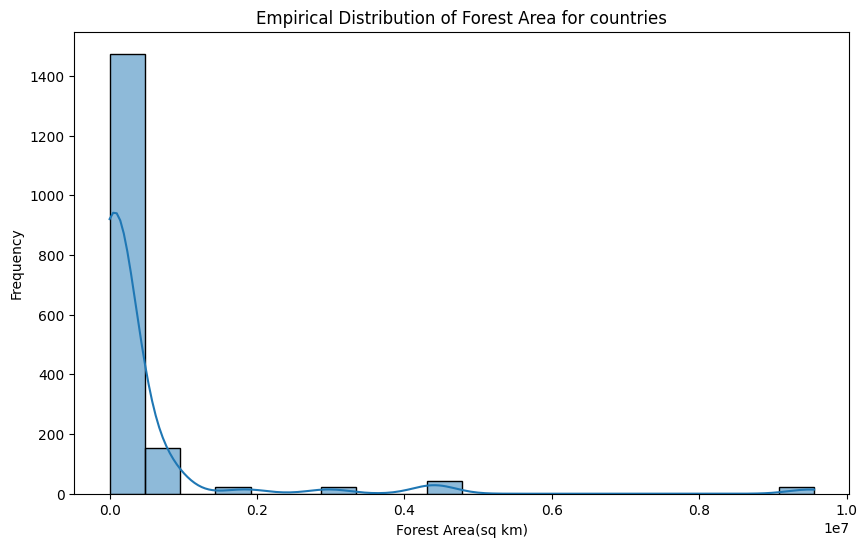

In [504]:
plt.figure(figsize=(10,6))
sns.histplot(last_df['forest'], bins=20, kde=True, edgecolor='black')

# Add labels and title
plt.xlabel('Forest Area(sq km)')
plt.ylabel('Frequency')
plt.title('Empirical Distribution of Forest Area for countries')

# Show the plot
plt.show()

In [505]:
last_df['forest'].skew()

np.float64(5.24180130846754)

# Inclusion of the dummy for the heterogeneity variable in sq km

In [506]:
last_df

,country,year,landArea,iso3,Total Size Cornfield in ha,corn,forest,suitability,% Land available,price,temperature,Average_Temperature,gdp
0,Afghanistan,2000.0,652230.0,AFG,96000.0,960.00,12281.1,239393.90,0.367039,2.3175,1.064,12.586175,3531.869351
1,Afghanistan,2001.0,652230.0,AFG,80000.0,800.00,11975.3,239553.90,0.367284,2.0900,1.377,13.413867,3620.525250
2,Afghanistan,2002.0,652230.0,AFG,100000.0,1000.00,11851.1,239353.90,0.366978,2.3575,1.457,13.051083,4285.191376
3,Afghanistan,2003.0,652230.0,AFG,250000.0,2500.00,11735.3,237853.90,0.364678,2.4600,0.710,12.485457,4898.791114
4,Afghanistan,2004.0,652230.0,AFG,250000.0,2500.00,11667.1,237853.90,0.364678,2.0475,1.482,13.233360,5504.073142
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1733,Zambia,2017.0,743390.0,ZMB,1433944.0,14339.44,473443.9,17364.16,0.023358,3.5075,0.579,21.990675,25895.263867
1734,Zambia,2018.0,743390.0,ZMB,1086006.0,10860.06,473059.8,20843.54,0.028038,3.7500,0.998,22.302766,26311.984274
1735,Zambia,2019.0,743390.0,ZMB,841693.0,8416.93,471995.7,23286.67,0.031325,3.8775,1.349,22.617600,23310.346721
1736,Zambia,2020.0,743390.0,ZMB,1333519.0,13335.19,471548.3,18368.41,0.024709,4.8400,1.386,22.167939,18063.780790


In [507]:
#Dummy for the heterogeneity variable
# Finding the median of Land_Size
initial_hetero_var = last_df['corn']
median_suitable_land = initial_hetero_var.median()
median_suitable_land
# Creating a dummy variable for whether the land size is higher than the median
last_df['heterogeneityDummy'] = last_df['suitability'].apply(lambda val: 1 if (val>median_suitable_land) else 0)
last_df


,country,year,landArea,iso3,Total Size Cornfield in ha,corn,forest,suitability,% Land available,price,temperature,Average_Temperature,gdp,heterogeneityDummy
0,Afghanistan,2000.0,652230.0,AFG,96000.0,960.00,12281.1,239393.90,0.367039,2.3175,1.064,12.586175,3531.869351,1
1,Afghanistan,2001.0,652230.0,AFG,80000.0,800.00,11975.3,239553.90,0.367284,2.0900,1.377,13.413867,3620.525250,1
2,Afghanistan,2002.0,652230.0,AFG,100000.0,1000.00,11851.1,239353.90,0.366978,2.3575,1.457,13.051083,4285.191376,1
3,Afghanistan,2003.0,652230.0,AFG,250000.0,2500.00,11735.3,237853.90,0.364678,2.4600,0.710,12.485457,4898.791114,1
4,Afghanistan,2004.0,652230.0,AFG,250000.0,2500.00,11667.1,237853.90,0.364678,2.0475,1.482,13.233360,5504.073142,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1733,Zambia,2017.0,743390.0,ZMB,1433944.0,14339.44,473443.9,17364.16,0.023358,3.5075,0.579,21.990675,25895.263867,1
1734,Zambia,2018.0,743390.0,ZMB,1086006.0,10860.06,473059.8,20843.54,0.028038,3.7500,0.998,22.302766,26311.984274,1
1735,Zambia,2019.0,743390.0,ZMB,841693.0,8416.93,471995.7,23286.67,0.031325,3.8775,1.349,22.617600,23310.346721,1
1736,Zambia,2020.0,743390.0,ZMB,1333519.0,13335.19,471548.3,18368.41,0.024709,4.8400,1.386,22.167939,18063.780790,1


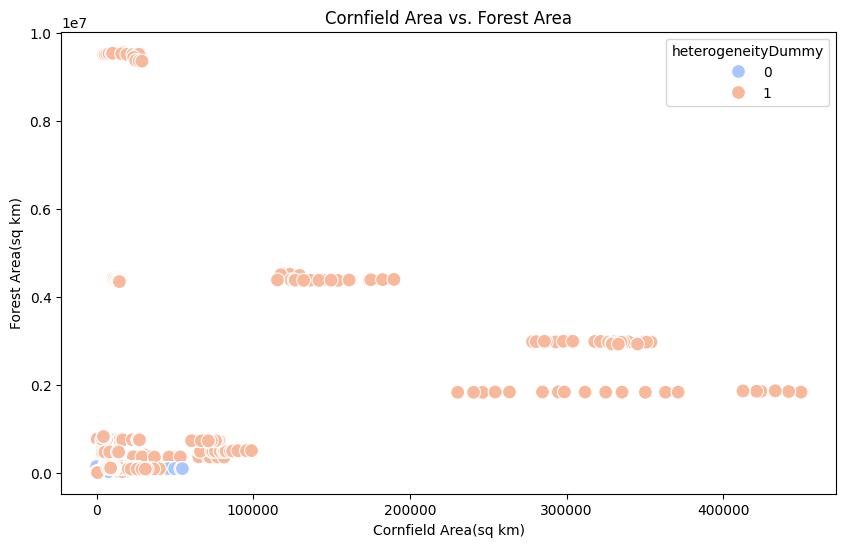

In [508]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=last_df,
                x='corn',
                y='forest',
                hue='heterogeneityDummy',
                palette='coolwarm',
                s=100)

# Adding labels and title
plt.title('Cornfield Area vs. Forest Area')
plt.xlabel('Cornfield Area(sq km)')
plt.ylabel('Forest Area(sq km)')

# Display the plot
plt.show()

<Figure size 1000x600 with 0 Axes>

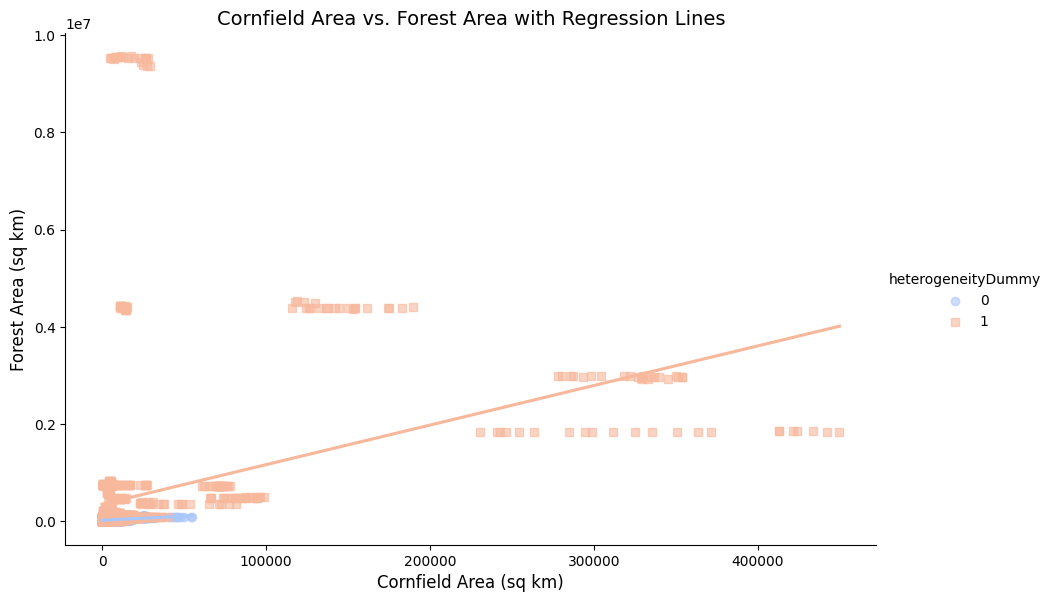

In [509]:
plt.figure(figsize=(10, 6))

# Create a scatterplot with regression lines
sns.lmplot(
    data=last_df,
    x='corn',
    y='forest',
    hue='heterogeneityDummy',
    palette='coolwarm',
    markers=['o', 's'],  # Different markers for each group
    ci=None,  # Remove confidence intervals for clarity (optional)
    height=6,  # Height of the plot
    aspect=1.5,  # Aspect ratio
    scatter_kws={'alpha': 0.6} #transparency
)

# Add labels and title
plt.title('Cornfield Area vs. Forest Area with Regression Lines', fontsize=14)
plt.xlabel('Cornfield Area (sq km)', fontsize=12)
plt.ylabel('Forest Area (sq km)', fontsize=12)

# Show the plot
plt.show()

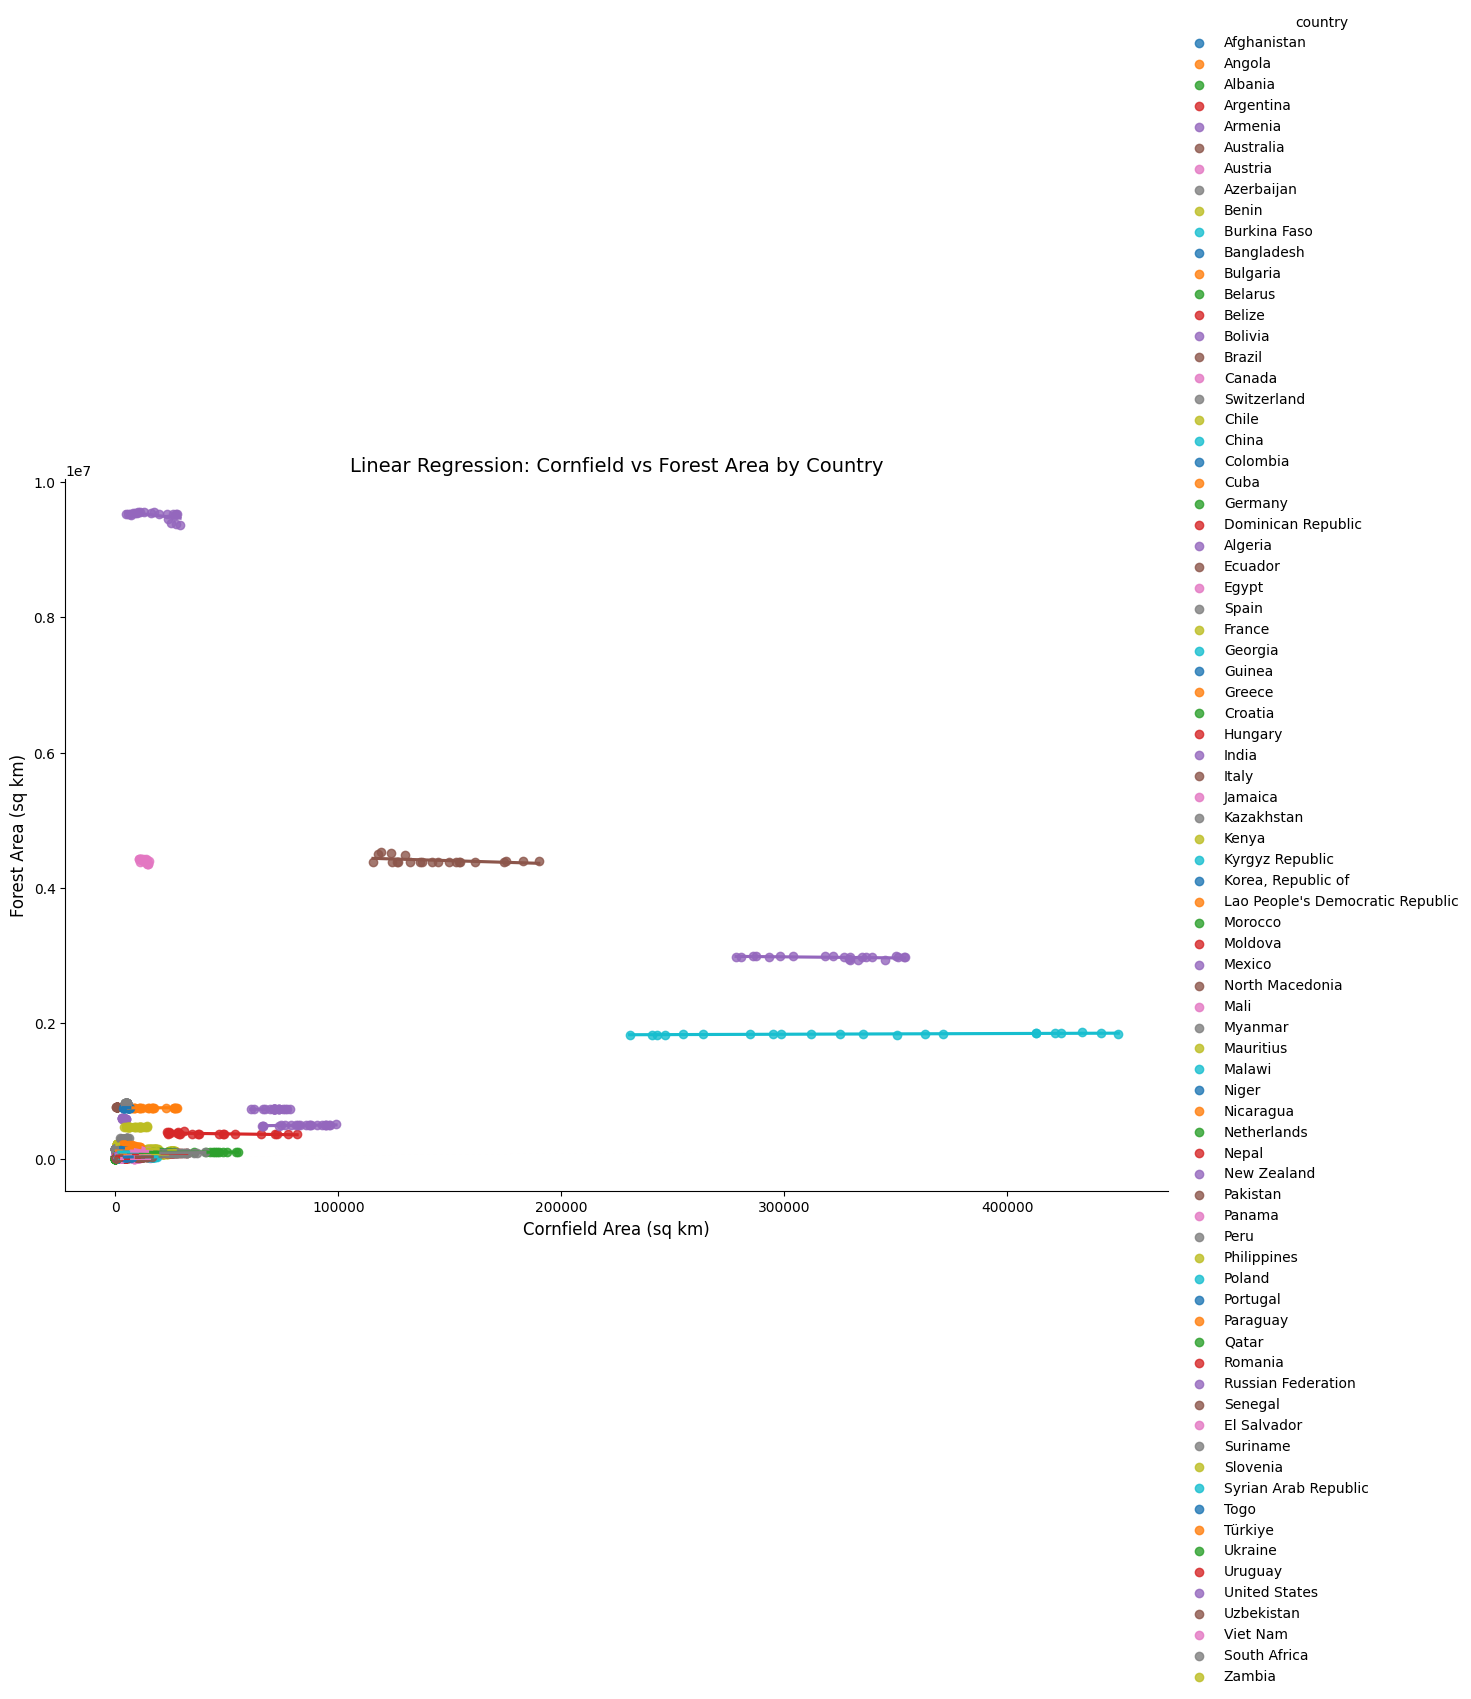

In [510]:
# Multiple linear regression lines, one for each country
sns.lmplot(
    data=last_df,
    x='corn',
    y='forest',
    hue='country',  # Different colors for each country
    palette='tab10',  # Choose a palette
    ci=None,  # Remove confidence intervals for clarity
    height=8,  # Figure height
    aspect=1.5  # Aspect ratio
)

# Add labels and title
plt.title('Linear Regression: Cornfield vs Forest Area by Country', fontsize=14)
plt.xlabel('Cornfield Area (sq km)', fontsize=12)
plt.ylabel('Forest Area (sq km)', fontsize=12)

# Show the plot
plt.show()

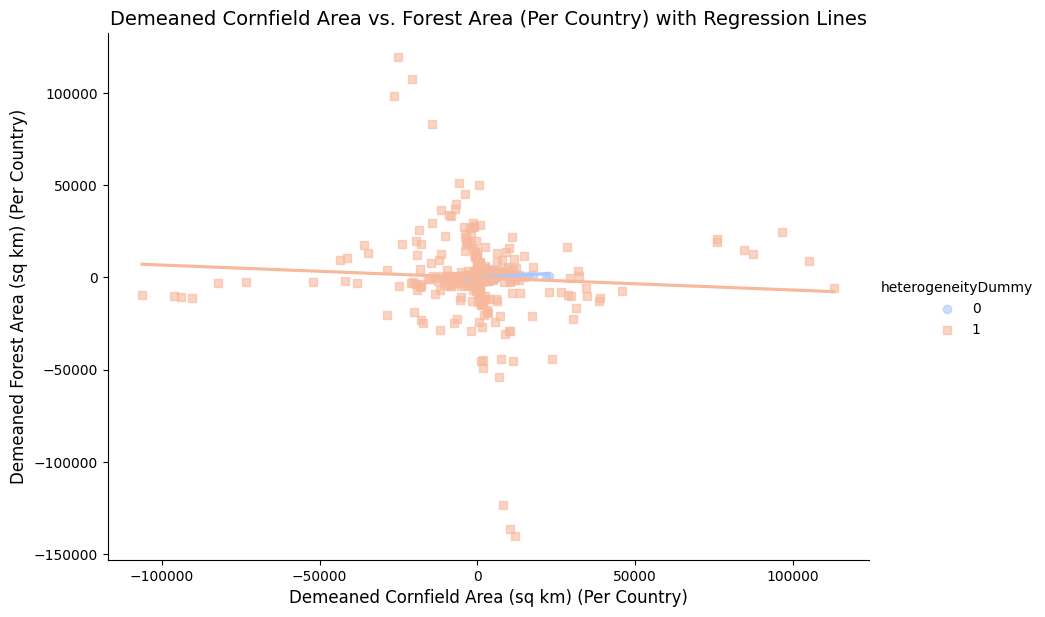

In [511]:
# Demean Cornfield Area` and  Forest Area` within each country
last_df['Demeaned_Cornfield_Area'] = last_df.groupby('country')['corn'].transform(lambda x: x - x.mean())
last_df['Demeaned_Forest_Area'] = last_df.groupby('country')['forest'].transform(lambda x: x - x.mean())

# Plot the demeaned data
sns.lmplot(
    data=last_df,
    x='Demeaned_Cornfield_Area',  # Demeaned Cornfield Area per country
    y='Demeaned_Forest_Area',  # Demeaned Forest Area per country
    hue='heterogeneityDummy',  # Group by suitability
    palette='coolwarm',
    markers=['o', 's'],  # Different markers for each group
    ci=None,  # Remove confidence intervals for clarity (optional)
    height=6,  # Height of the plot
    aspect=1.5,  # Aspect ratio
    scatter_kws={'alpha': 0.6} #transparency
)

# Add labels and title
plt.title('Demeaned Cornfield Area vs. Forest Area (Per Country) with Regression Lines', fontsize=14)
plt.xlabel('Demeaned Cornfield Area (sq km) (Per Country)', fontsize=12)
plt.ylabel('Demeaned Forest Area (sq km) (Per Country)', fontsize=12)

# Show the plot
plt.show()

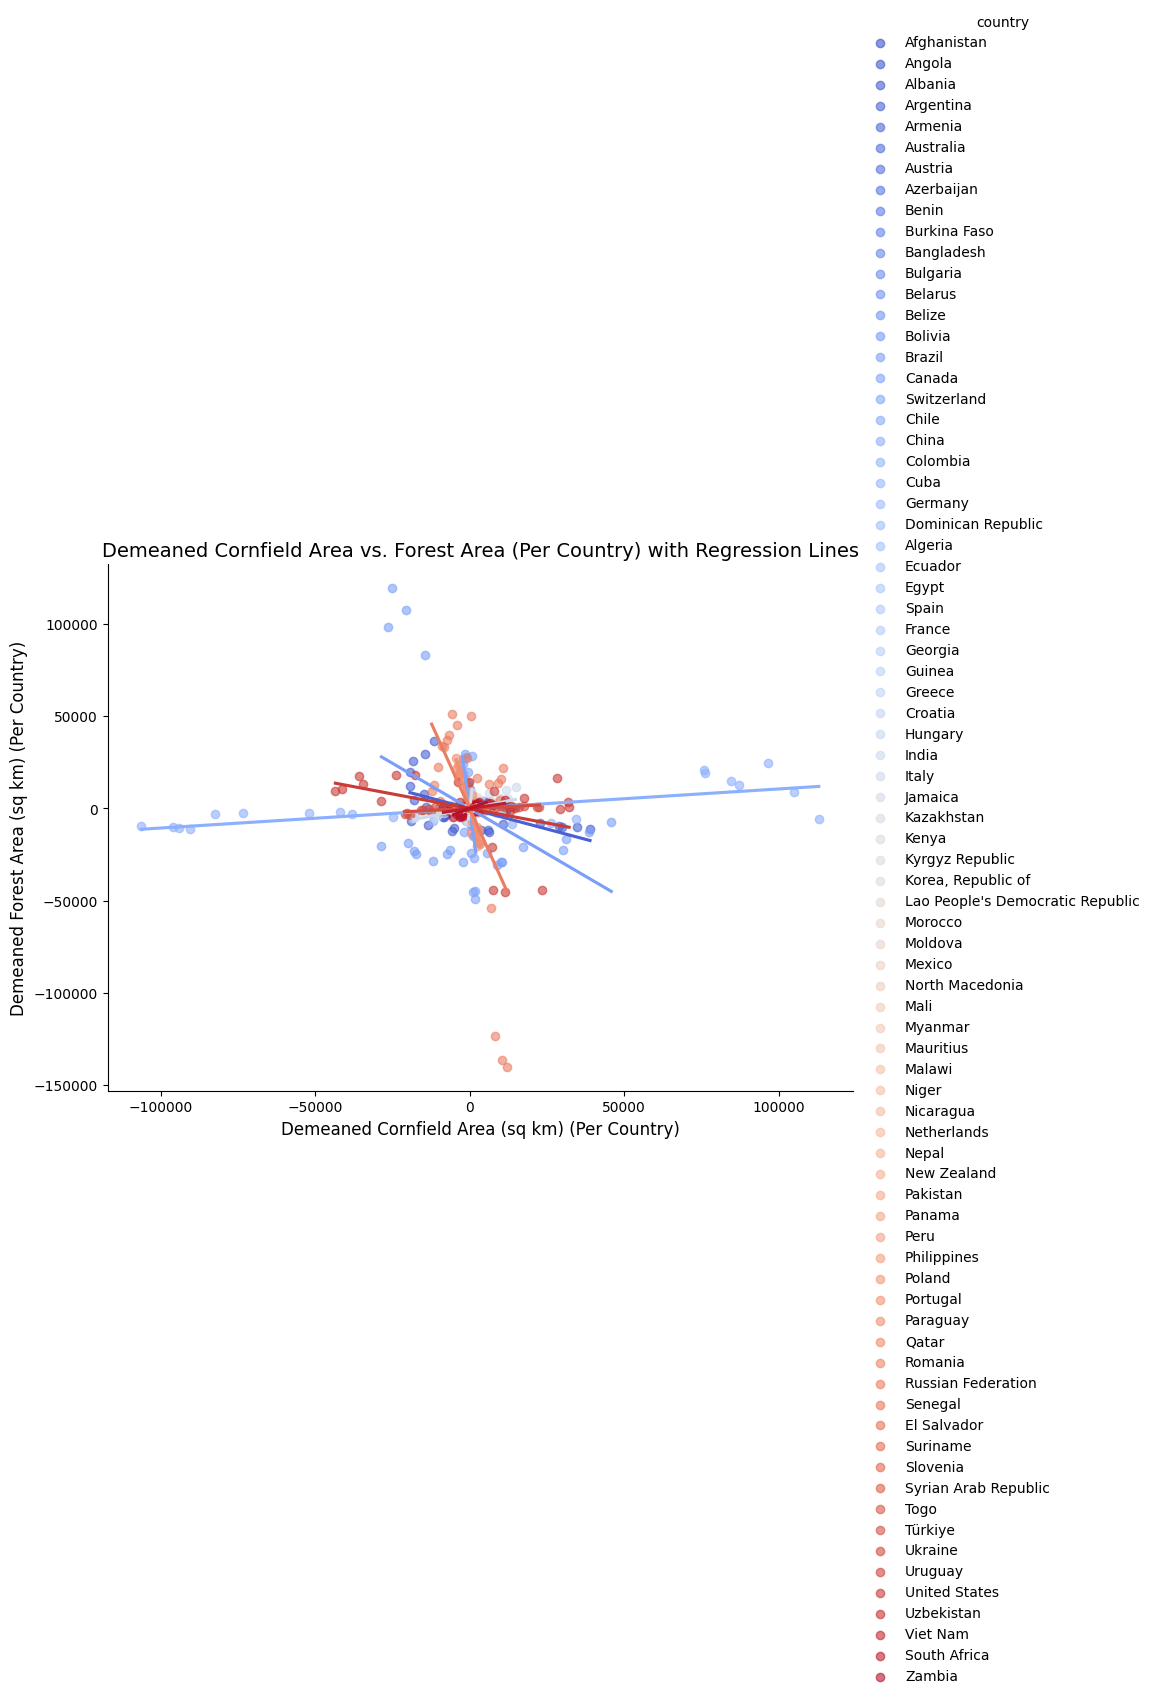

In [512]:

# Plot the demeaned data
sns.lmplot(
    data=last_df,
    x='Demeaned_Cornfield_Area',  # Demeaned Cornfield Area per country
    y='Demeaned_Forest_Area',  # Demeaned Forest Area per country
    hue='country',  # Group by suitability
    palette='coolwarm',
    ci=None,  # Remove confidence intervals for clarity (optional)
    height=6,  # Height of the plot
    aspect=1.5,  # Aspect ratio
    scatter_kws={'alpha': 0.6} #transparency
)

# Add labels and title
plt.title('Demeaned Cornfield Area vs. Forest Area (Per Country) with Regression Lines', fontsize=14)
plt.xlabel('Demeaned Cornfield Area (sq km) (Per Country)', fontsize=12)
plt.ylabel('Demeaned Forest Area (sq km) (Per Country)', fontsize=12)

# Show the plot
plt.show()

In [513]:
# correlation between cornfield area and forest area for group 0,
#so for countries with suitable land available for corn expansion lower than the median:
group0 = last_df[last_df['heterogeneityDummy']==0]
correlation0 = group0['corn'].corr(group0['forest'])

# correlation between cornfield area and forest area for group 1,
#so for countries with suitable land available for corn expansion higher than the median:
group1 = last_df[last_df['heterogeneityDummy']==1]
correlation1 = group1['corn'].corr(group1['forest'])

print(f"Correlation for Group 0: {correlation0}")
print(f"Correlation for Group 1: {correlation1}")

Correlation for Group 0: 0.38923467091318464
Correlation for Group 1: 0.34794697904518257


In [514]:
# correlation between cornfield area and forest area for group 0,
#so for countries with suitable land available for corn expansion lower than the median:
group0 = last_df[last_df['heterogeneityDummy']==0]
correlation0 = group0['Demeaned_Cornfield_Area'].corr(group0['Demeaned_Forest_Area'])

# correlation between cornfield area and forest area for group 1,
#so for countries with suitable land available for corn expansion higher than the median:
group1 = last_df[last_df['heterogeneityDummy']==1]
correlation1 = group1['Demeaned_Cornfield_Area'].corr(group1['Demeaned_Forest_Area'])

print(f"Correlation for Group 0: {correlation0}")
print(f"Correlation for Group 1: {correlation1}")

Correlation for Group 0: 0.3742212028141467
Correlation for Group 1: -0.06703129622167522


## Linear Regressions

In [515]:
last_df

,country,year,landArea,iso3,Total Size Cornfield in ha,corn,forest,suitability,% Land available,price,temperature,Average_Temperature,gdp,heterogeneityDummy,Demeaned_Cornfield_Area,Demeaned_Forest_Area
0,Afghanistan,2000.0,652230.0,AFG,96000.0,960.00,12281.1,239393.90,0.367039,2.3175,1.064,12.586175,3531.869351,1,-514.690455,550.450000
1,Afghanistan,2001.0,652230.0,AFG,80000.0,800.00,11975.3,239553.90,0.367284,2.0900,1.377,13.413867,3620.525250,1,-674.690455,244.650000
2,Afghanistan,2002.0,652230.0,AFG,100000.0,1000.00,11851.1,239353.90,0.366978,2.3575,1.457,13.051083,4285.191376,1,-474.690455,120.450000
3,Afghanistan,2003.0,652230.0,AFG,250000.0,2500.00,11735.3,237853.90,0.364678,2.4600,0.710,12.485457,4898.791114,1,1025.309545,4.650000
4,Afghanistan,2004.0,652230.0,AFG,250000.0,2500.00,11667.1,237853.90,0.364678,2.0475,1.482,13.233360,5504.073142,1,1025.309545,-63.550000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1733,Zambia,2017.0,743390.0,ZMB,1433944.0,14339.44,473443.9,17364.16,0.023358,3.5075,0.579,21.990675,25895.263867,1,5456.480000,3055.713636
1734,Zambia,2018.0,743390.0,ZMB,1086006.0,10860.06,473059.8,20843.54,0.028038,3.7500,0.998,22.302766,26311.984274,1,1977.100000,2671.613636
1735,Zambia,2019.0,743390.0,ZMB,841693.0,8416.93,471995.7,23286.67,0.031325,3.8775,1.349,22.617600,23310.346721,1,-466.030000,1607.513636
1736,Zambia,2020.0,743390.0,ZMB,1333519.0,13335.19,471548.3,18368.41,0.024709,4.8400,1.386,22.167939,18063.780790,1,4452.230000,1160.113636


In [516]:
import statsmodels.api as sm

ind_x = last_df[["corn"]]
dep_y = last_df["forest"]

# Add constant to the independent variables for the intercept in regression
ind_x = sm.add_constant(ind_x)

# Fit the linear regression model
model = sm.OLS(dep_y, ind_x).fit()

# Display the regression results
model_summary = model.summary()
model_summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 forest   R-squared:                       0.127
Model:                            OLS   Adj. R-squared:                  0.127
Method:                 Least Squares   F-statistic:                     253.3
Date:                Tue, 10 Dec 2024   Prob (F-statistic):           2.46e-53
Time:                        07:16:34   Log-Likelihood:                -26807.
No. Observations:                1738   AIC:                         5.362e+04
Df Residuals:                    1736   BIC:                         5.363e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.635e+05   3.05e+04      8.642      0.000    2.04e+05    3.23e+05
corn           8.3763      0.526     15.914      0.000       7.344       9.409
==============================================================================
Omnibus:                     1989.389   Durbin-Watson:                   0.085
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           125153.049
Skew:                           6.028   Prob(JB):                         0.00
Kurtosis:                      42.785   Cond. No.                     6.09e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.09e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Multiple Linear Regressions

The regression equation from the results is:

$$
\hat{Y}_{it} = \beta_{0} + \beta_1 X_{1it} + \beta_2 H_{it} + \beta_2 X_{2it} + \beta_3 X_{3it} + \beta_4 X_{4it} +\beta_5 (X_{1it}*H_{it}) + \epsilon_{it}
$$

Where:
- $\hat{Y}$: Predicted Forest Area in sq km
- $X_1$: Cornfield in sq km
- $H_{it}$: Suitable land for corn field extension. Heterogeneity variable, higher than median
- $X_2$: Average Temperature
- $X_3$: Corn price per bushel
- $X_4$: GDP
- $X_1 * H_{it}$: **Interaction variable** between **Cornfield in sq km** and **Suitable Land Higher Than Median**
- $\beta_0, \beta_1, \beta_2, \beta_3, \beta_4, \beta_5$: Coefficients from the regression model.


In [549]:
#Multivariable regression /w Temperature_Change
ind_x = last_df[["corn","suitability","temperature", "price", "gdp", "landArea"]]
#ind_x["Interaction variable"] = last_df["heterogeneityDummy"]*ind_x["corn"]
ind_x["Interaction variable"] = last_df["corn"]

dep_y = last_df["forest"]

# Add constant to the independent variables for the intercept in regression
ind_x = sm.add_constant(ind_x)

# Fit the linear regression model
model = sm.OLS(dep_y, ind_x).fit()

# Display the regression results
model_summary = model.summary()
model_summary

/var/folders/z1/yry6nb4j25bg_5n5f28yn9zw0000gn/T/ipykernel_15279/2945103426.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 forest   R-squared:                       0.900
Model:                            OLS   Adj. R-squared:                  0.899
Method:                 Least Squares   F-statistic:                     2591.
Date:                Tue, 10 Dec 2024   Prob (F-statistic):               0.00
Time:                        07:26:09   Log-Likelihood:                -24926.
No. Observations:                1738   AIC:                         4.987e+04
Df Residuals:                    1731   BIC:                         4.990e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                -1.799e+05   3.39e+04     -5.300      0.000   -2.46e+05   -1.13e+05
corn                    -1.3224      0.185     -7.156      0.000      -1.685      -0.960
suitability             -1.3822      0.054    -25.799      0.000      -1.487      -1.277
temperature           8.103e+04   1.85e+04      4.390      0.000    4.48e+04    1.17e+05
price                -4825.4470   7000.860     -0.689      0.491   -1.86e+04    8905.587
gdp                      0.0167      0.009      1.936      0.053      -0.000       0.034
landArea                 0.6493      0.007     86.809      0.000       0.635       0.664
Interaction variable    -1.3224      0.185     -7.157      0.000      -1.685      -0.960
==============================================================================
Omnibus:                     1145.229   Durbin-Watson:                   0.104
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            16742.992
Skew:                          -2.904   Prob(JB):                         0.00
Kurtosis:                      17.052   Cond. No.                     2.52e+17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.07e-19. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [518]:
#Multivariable regression /w Average_Temperature
ind_x = last_df[["corn","suitability","Average_Temperature","price", "gdp", "landArea"]]
ind_x["Interaction variable"] = last_df["corn"]

dep_y = last_df["forest"]

# Add constant to the independent variables for the intercept in regression
ind_x = sm.add_constant(ind_x)

# Fit the linear regression model
model = sm.OLS(dep_y, ind_x).fit()

# Display the regression results
model_summary = model.summary()
model_summary

/var/folders/z1/yry6nb4j25bg_5n5f28yn9zw0000gn/T/ipykernel_15279/943450807.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 forest   R-squared:                       0.907
Model:                            OLS   Adj. R-squared:                  0.907
Method:                 Least Squares   F-statistic:                     2829.
Date:                Tue, 10 Dec 2024   Prob (F-statistic):               0.00
Time:                        07:16:34   Log-Likelihood:                -24857.
No. Observations:                1738   AIC:                         4.973e+04
Df Residuals:                    1731   BIC:                         4.977e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 2.008e+05   3.71e+04      5.408      0.000    1.28e+05    2.74e+05
corn                    -0.7526      0.184     -4.094      0.000      -1.113      -0.392
suitability             -1.5525      0.053    -29.136      0.000      -1.657      -1.448
Average_Temperature  -1.706e+04   1332.917    -12.802      0.000   -1.97e+04   -1.44e+04
price                  600.4127   6677.876      0.090      0.928   -1.25e+04    1.37e+04
gdp                     -0.0017      0.008     -0.204      0.838      -0.018       0.015
landArea                 0.6526      0.007     90.769      0.000       0.639       0.667
Interaction variable    -0.7526      0.184     -4.094      0.000      -1.113      -0.392
==============================================================================
Omnibus:                      975.249   Durbin-Watson:                   0.089
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             9638.274
Skew:                          -2.470   Prob(JB):                         0.00
Kurtosis:                      13.426   Cond. No.                     2.52e+17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.07e-19. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

Correlation Matrix:
                          corn  suitability  Average_Temperature     price  \
corn                  1.000000     0.697299            -0.120314  0.021447   
suitability           0.697299     1.000000            -0.360761 -0.002707   
Average_Temperature  -0.120314    -0.360761             1.000000  0.009894   
price                 0.021447    -0.002707             0.009894  1.000000   
gdp                   0.841914     0.612448            -0.216390  0.057780   
landArea              0.566457     0.872723            -0.312175 -0.000072   
Interaction variable  1.000000     0.697299            -0.120314  0.021447   
forest                0.356814     0.663018            -0.334987 -0.000596   

                           gdp  landArea  Interaction variable    forest  
corn                  0.841914  0.566457              1.000000  0.356814  
suitability           0.612448  0.872723              0.697299  0.663018  
Average_Temperature  -0.216390 -0.312175            

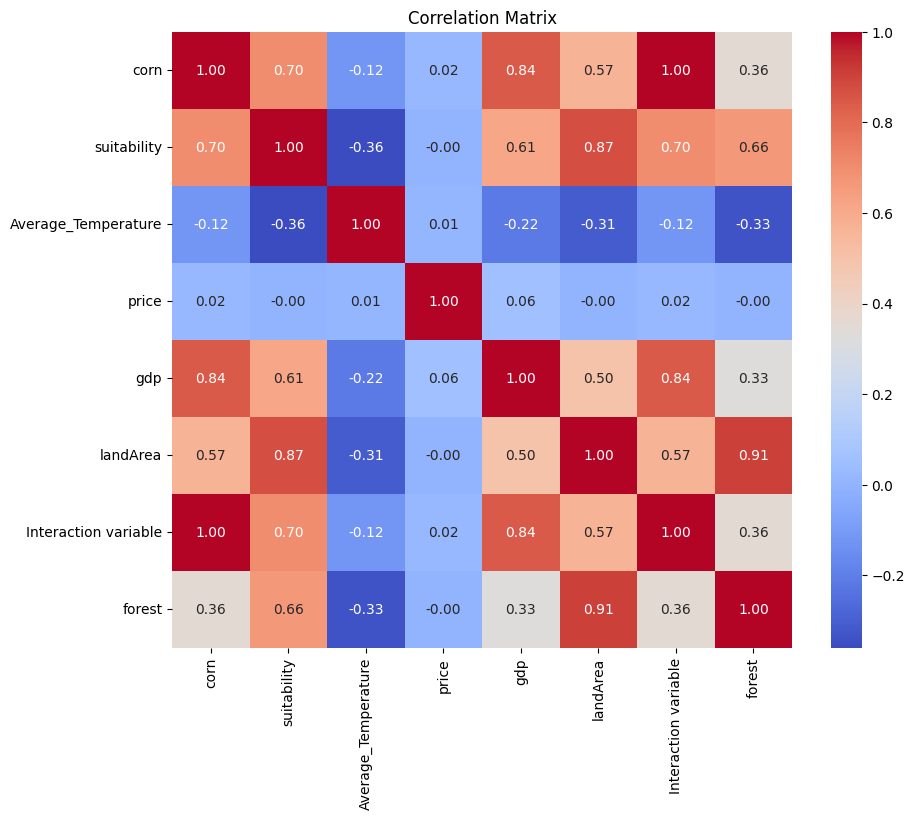

In [519]:
# Combine independent variables and dependent variable for the correlation matrix
variables = ind_x.drop(columns="const").join(dep_y.rename("forest"))

# Compute the correlation matrix
correlation_matrix = variables.corr()

# Display the correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()


In [520]:
last_df["logcorn"]= np.log(last_df["corn"])
last_df["logforest"]= np.log(last_df["forest"])
last_df["logland"]= np.log(last_df["landArea"])
last_df["loggdp"]= np.log(last_df['gdp'])
last_df

,country,year,landArea,iso3,Total Size Cornfield in ha,corn,forest,suitability,% Land available,price,temperature,Average_Temperature,gdp,heterogeneityDummy,Demeaned_Cornfield_Area,Demeaned_Forest_Area,logcorn,logforest,logland,loggdp
0,Afghanistan,2000.0,652230.0,AFG,96000.0,960.00,12281.1,239393.90,0.367039,2.3175,1.064,12.586175,3531.869351,1,-514.690455,550.450000,6.866933,9.415817,13.388153,8.169583
1,Afghanistan,2001.0,652230.0,AFG,80000.0,800.00,11975.3,239553.90,0.367284,2.0900,1.377,13.413867,3620.525250,1,-674.690455,244.650000,6.684612,9.390601,13.388153,8.194374
2,Afghanistan,2002.0,652230.0,AFG,100000.0,1000.00,11851.1,239353.90,0.366978,2.3575,1.457,13.051083,4285.191376,1,-474.690455,120.450000,6.907755,9.380176,13.388153,8.362920
3,Afghanistan,2003.0,652230.0,AFG,250000.0,2500.00,11735.3,237853.90,0.364678,2.4600,0.710,12.485457,4898.791114,1,1025.309545,4.650000,7.824046,9.370357,13.388153,8.496744
4,Afghanistan,2004.0,652230.0,AFG,250000.0,2500.00,11667.1,237853.90,0.364678,2.0475,1.482,13.233360,5504.073142,1,1025.309545,-63.550000,7.824046,9.364528,13.388153,8.613244
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1733,Zambia,2017.0,743390.0,ZMB,1433944.0,14339.44,473443.9,17364.16,0.023358,3.5075,0.579,21.990675,25895.263867,1,5456.480000,3055.713636,9.570769,13.067789,13.518976,10.161815
1734,Zambia,2018.0,743390.0,ZMB,1086006.0,10860.06,473059.8,20843.54,0.028038,3.7500,0.998,22.302766,26311.984274,1,1977.100000,2671.613636,9.292847,13.066977,13.518976,10.177780
1735,Zambia,2019.0,743390.0,ZMB,841693.0,8416.93,471995.7,23286.67,0.031325,3.8775,1.349,22.617600,23310.346721,1,-466.030000,1607.513636,9.038000,13.064725,13.518976,10.056653
1736,Zambia,2020.0,743390.0,ZMB,1333519.0,13335.19,471548.3,18368.41,0.024709,4.8400,1.386,22.167939,18063.780790,1,4452.230000,1160.113636,9.498162,13.063777,13.518976,9.801664


In [521]:
ind_x = last_df[["logcorn"]]

dep_y = last_df["logforest"]

# Add constant to the independent variables for the intercept in regression
ind_x = sm.add_constant(ind_x)

# Fit the linear regression model
model = sm.OLS(dep_y, ind_x).fit()

# Display the regression results
model_summary = model.summary()
model_summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              logforest   R-squared:                       0.354
Model:                            OLS   Adj. R-squared:                  0.354
Method:                 Least Squares   F-statistic:                     952.5
Date:                Tue, 10 Dec 2024   Prob (F-statistic):          4.23e-167
Time:                        07:16:34   Log-Likelihood:                -3332.3
No. Observations:                1738   AIC:                             6669.
Df Residuals:                    1736   BIC:                             6679.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.3963      0.120     61.749      0.000       7.161       7.631
logcorn        0.4605      0.015     30.862      0.000       0.431       0.490
==============================================================================
Omnibus:                       83.289   Durbin-Watson:                   0.103
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              235.388
Skew:                           0.194   Prob(JB):                     7.69e-52
Kurtosis:                       4.761   Cond. No.                         24.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [522]:
#Multivariable regression /w Temperature_Change
ind_x = last_df[["logcorn","suitability","temperature","price", "gdp", "logland"]]
ind_x["Interaction variable"] = ind_x["logcorn"]

dep_y = last_df["logforest"]

# Add constant to the independent variables for the intercept in regression
ind_x = sm.add_constant(ind_x)

# Fit the linear regression model
model = sm.OLS(dep_y, ind_x).fit()

# Display the regression results
model_summary = model.summary()
model_summary

/var/folders/z1/yry6nb4j25bg_5n5f28yn9zw0000gn/T/ipykernel_15279/1530513571.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              logforest   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                     444.4
Date:                Tue, 10 Dec 2024   Prob (F-statistic):               0.00
Time:                        07:16:35   Log-Likelihood:                -2902.2
No. Observations:                1738   AIC:                             5818.
Df Residuals:                    1731   BIC:                             5857.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    2.3574      0.303      7.775      0.000       1.763       2.952
logcorn                  0.1003      0.007     13.696      0.000       0.086       0.115
suitability           7.509e-07   1.08e-07      6.962      0.000    5.39e-07    9.62e-07
temperature             -0.2206      0.058     -3.813      0.000      -0.334      -0.107
price                    0.0053      0.022      0.241      0.809      -0.038       0.048
gdp                  -3.246e-09   1.88e-08     -0.173      0.863   -4.02e-08    3.37e-08
logland                  0.5680      0.026     21.669      0.000       0.517       0.619
Interaction variable     0.1003      0.007     13.696      0.000       0.086       0.115
==============================================================================
Omnibus:                      495.923   Durbin-Watson:                   0.109
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1799.206
Skew:                          -1.368   Prob(JB):                         0.00
Kurtosis:                       7.166   Cond. No.                     4.77e+21
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.85e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

# **FIXED EFFECTS**

In [523]:
!pip install linearmodels

Defaulting to user installation because normal site-packages is not writeable


In [524]:
from linearmodels.panel import PanelOLS
from statsmodels.tools import add_constant

In [525]:
last_df['country'] = last_df['country'].astype('category')
last_df['year'] = last_df['year'].astype('int')

In [526]:
print(last_df['country'].dtype, last_df['year'].dtype)

category int64


In [527]:
last_df[(last_df['country'] == 'Afghanistan') & (last_df['year'] == 2000)]

,country,year,landArea,iso3,Total Size Cornfield in ha,corn,forest,suitability,% Land available,price,temperature,Average_Temperature,gdp,heterogeneityDummy,Demeaned_Cornfield_Area,Demeaned_Forest_Area,logcorn,logforest,logland,loggdp
0,Afghanistan,2000,652230.0,AFG,96000.0,960.0,12281.1,239393.9,0.367039,2.3175,1.064,12.586175,3531.869351,1,-514.690455,550.45,6.866933,9.415817,13.388153,8.169583


In [528]:
last_df.keys()

Index(['country', 'year', 'landArea', 'iso3', 'Total Size Cornfield in ha',
       'corn', 'forest', 'suitability', '% Land available', 'price',
       'temperature', 'Average_Temperature', 'gdp', 'heterogeneityDummy',
       'Demeaned_Cornfield_Area', 'Demeaned_Forest_Area', 'logcorn',
       'logforest', 'logland', 'loggdp'],
      dtype='object')

# NO LOG FE

In [529]:
fe = last_df[['country', 'year', 'landArea', 'iso3', 'corn', 'forest', 'suitability', 'price', 'temperature', 
              'gdp', 'heterogeneityDummy', 'logcorn', 'logforest', 'logland', 'loggdp']]

In [530]:
fe = fe.set_index(['country', 'year'])

In [531]:
fe.index

MultiIndex([('Afghanistan', 2000),
            ('Afghanistan', 2001),
            ('Afghanistan', 2002),
            ('Afghanistan', 2003),
            ('Afghanistan', 2004),
            ('Afghanistan', 2005),
            ('Afghanistan', 2006),
            ('Afghanistan', 2007),
            ('Afghanistan', 2008),
            ('Afghanistan', 2009),
            ...
            (     'Zambia', 2012),
            (     'Zambia', 2013),
            (     'Zambia', 2014),
            (     'Zambia', 2015),
            (     'Zambia', 2016),
            (     'Zambia', 2017),
            (     'Zambia', 2018),
            (     'Zambia', 2019),
            (     'Zambia', 2020),
            (     'Zambia', 2021)],
           names=['country', 'year'], length=1738)

In [532]:
Y = fe['forest']
X = fe[['corn', 'gdp', 'suitability', 'price', 'temperature', 'landArea']]
X = add_constant(X)

In [533]:
model = PanelOLS(dependent=Y, exog=X, entity_effects=True, time_effects=True, drop_absorbed=True)
results = model.fit()

fe_data = {
    'Model': 'FE',
    'coef': results.params['corn'],
    '2.5 %': results.conf_int().loc['corn', 'lower'],
    '97.5 %': results.conf_int().loc['corn', 'upper']
}
fe_data = pd.DataFrame([fe_data]).set_index('Model')
print(results)

                          PanelOLS Estimation Summary                           
Dep. Variable:                 forest   R-squared:                        0.0239
Estimator:                   PanelOLS   R-squared (Between):              0.7705
No. Observations:                1738   R-squared (Within):               0.0297
Date:                Tue, Dec 10 2024   R-squared (Overall):              0.7705
Time:                        07:16:35   Log-likelihood                -1.837e+04
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      10.015
Entities:                          79   P-value                           0.0000
Avg Obs:                       22.000   Distribution:                  F(4,1634)
Min Obs:                       22.000                                           
Max Obs:                       22.000   F-statistic (robust):             10.015
                            

/Users/zeliadecaillet/Library/Python/3.9/lib/python/site-packages/linearmodels/panel/data.py:590: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

/Users/zeliadecaillet/Library/Python/3.9/lib/python/site-packages/linearmodels/panel/data.py:590: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

/Users/zeliadecaillet/Library/Python/3.9/lib/python/site-packages/linearmodels/panel/data.py:590: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this wa

# LOG FE

In [534]:
logfe = fe

In [535]:
logY = fe['logforest']
logX = fe[['logcorn', 'loggdp', 'logland', 'suitability', 'price', 'temperature']]
logX = add_constant(logX)

In [536]:
logmodel = PanelOLS(dependent=logY, exog=logX, entity_effects=True, time_effects=True, drop_absorbed=True)
log_feresults = logmodel.fit()

logfe_data = {
    'Model': 'FE',
    'coef': log_feresults.params['logcorn'],
    '2.5 %': log_feresults.conf_int().loc['logcorn', 'lower'],
    '97.5 %': log_feresults.conf_int().loc['logcorn', 'upper']
}

logfe_data = pd.DataFrame([logfe_data]).set_index('Model')

print(log_feresults)

                          PanelOLS Estimation Summary                           
Dep. Variable:              logforest   R-squared:                        0.0399
Estimator:                   PanelOLS   R-squared (Between):             -0.0857
No. Observations:                1738   R-squared (Within):               0.0431
Date:                Tue, Dec 10 2024   R-squared (Overall):             -0.0857
Time:                        07:16:35   Log-likelihood                    3226.9
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      13.575
Entities:                          79   P-value                           0.0000
Avg Obs:                       22.000   Distribution:                  F(5,1633)
Min Obs:                       22.000                                           
Max Obs:                       22.000   F-statistic (robust):             13.575
                            

/Users/zeliadecaillet/Library/Python/3.9/lib/python/site-packages/linearmodels/panel/data.py:590: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

/Users/zeliadecaillet/Library/Python/3.9/lib/python/site-packages/linearmodels/panel/data.py:590: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

/Users/zeliadecaillet/Library/Python/3.9/lib/python/site-packages/linearmodels/panel/data.py:590: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this wa

In [537]:
last_df

,country,year,landArea,iso3,Total Size Cornfield in ha,corn,forest,suitability,% Land available,price,temperature,Average_Temperature,gdp,heterogeneityDummy,Demeaned_Cornfield_Area,Demeaned_Forest_Area,logcorn,logforest,logland,loggdp
0,Afghanistan,2000,652230.0,AFG,96000.0,960.00,12281.1,239393.90,0.367039,2.3175,1.064,12.586175,3531.869351,1,-514.690455,550.450000,6.866933,9.415817,13.388153,8.169583
1,Afghanistan,2001,652230.0,AFG,80000.0,800.00,11975.3,239553.90,0.367284,2.0900,1.377,13.413867,3620.525250,1,-674.690455,244.650000,6.684612,9.390601,13.388153,8.194374
2,Afghanistan,2002,652230.0,AFG,100000.0,1000.00,11851.1,239353.90,0.366978,2.3575,1.457,13.051083,4285.191376,1,-474.690455,120.450000,6.907755,9.380176,13.388153,8.362920
3,Afghanistan,2003,652230.0,AFG,250000.0,2500.00,11735.3,237853.90,0.364678,2.4600,0.710,12.485457,4898.791114,1,1025.309545,4.650000,7.824046,9.370357,13.388153,8.496744
4,Afghanistan,2004,652230.0,AFG,250000.0,2500.00,11667.1,237853.90,0.364678,2.0475,1.482,13.233360,5504.073142,1,1025.309545,-63.550000,7.824046,9.364528,13.388153,8.613244
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1733,Zambia,2017,743390.0,ZMB,1433944.0,14339.44,473443.9,17364.16,0.023358,3.5075,0.579,21.990675,25895.263867,1,5456.480000,3055.713636,9.570769,13.067789,13.518976,10.161815
1734,Zambia,2018,743390.0,ZMB,1086006.0,10860.06,473059.8,20843.54,0.028038,3.7500,0.998,22.302766,26311.984274,1,1977.100000,2671.613636,9.292847,13.066977,13.518976,10.177780
1735,Zambia,2019,743390.0,ZMB,841693.0,8416.93,471995.7,23286.67,0.031325,3.8775,1.349,22.617600,23310.346721,1,-466.030000,1607.513636,9.038000,13.064725,13.518976,10.056653
1736,Zambia,2020,743390.0,ZMB,1333519.0,13335.19,471548.3,18368.41,0.024709,4.8400,1.386,22.167939,18063.780790,1,4452.230000,1160.113636,9.498162,13.063777,13.518976,9.801664


In [545]:
# Step 0: Load and prepare the dataset
last_df = pd.read_csv('https://raw.githubusercontent.com/ZeliaDec/DataScience/main/Data/' + 'Database.csv')
df_full = pd.read_csv('https://www.qogdata.pol.gu.se/data/qog_std_ts_jan24.csv', low_memory=False)
last_df = last_df.rename(columns={'iso3': 'ccodealp'})


#some cofounders that might be useful, my domain knowledge tells me that these are important
# Define variables of interest for initial analysis
#variables_of_interest = ['cname', 'ccodealp', 'year', 'wdi_co2', 'sgi_ec', 'ti_cpi',
                        # 'wdi_gdppppcon2017', 'wdi_popurb', 'pg_regtoreen', 'wdi_oilrent',
                         #'wdi_popgr', 'wdi_trade']
variables_of_interest = ['cname', 'ccodealp', 'year', "wbgi_gee", "wbgi_pve", "gpi_gpi", "wdi_popden", "wdi_poprul"]
df_cleaned = df_full[variables_of_interest]


#this step is only necessary, if you don't have the data already cleaned, not the case for me
# Drop rows with missing values and apply transformations
df_cleaned = df_cleaned.dropna()
#df_cleaned['wdi_co2'] = df_cleaned['wdi_co2'] * 1000
#df_cleaned['pg_regtoreen'] = df_cleaned['pg_regtoreen'] / 1000
df_cleaned = pd.get_dummies(df_cleaned, columns=['ccodealp'], drop_first=False)

# Merge df_cleaned with df_full and retain only perfect matches
df_merged = pd.merge(df_cleaned[['cname', 'year']], df_full, on=['cname', 'year'], how='left')
#df_merged = pd.merge(df_merged, last_df, on=['ccodealp', 'year'], how='left')
#df_merged = df_merged.dropna()
perfect_match_columns = [col for col in df_merged.columns if df_merged[col].notna().all()]
df = df_merged[perfect_match_columns]
df = pd.merge(last_df, df, on=['ccodealp', 'year'], how='left')
df = df.dropna()

#drop non necessary columns
# don't want to work with the identifiers
#df = df.drop([ 'cname','ccode', 'ccode_qog', 'cname_qog', 'ccodecow', 'version', 'cname_year', 'ccodealp_year'], axis=1)
df = df.drop([ 'cname','ccode', 'ccode_qog', 'cname_qog', 'version','cname_year', 'ccodealp_year', 'country', 'price', 'gdp'], axis=1)

              
# Sort the DataFrame by 'id' and 'year' to ensure correct ordering
df = df.sort_values(['ccodealp', 'year']).reset_index(drop=True)

df.head()

,year,landArea,ccodealp,Total Size Cornfield in ha,corn,forest,suitability,% Land available,temperature,Average_Temperature,...,wgov_min,wgov_minfem,wgov_minmil,wgov_tot,wgov_totfem,wgov_totmil,wgov_totten,who_infmortf,who_infmortm,who_infmortt
0,2008.0,652230.0,AFG,137000.0,1370.0,11606.6,238983.9,0.366410,0.808,12.709591,...,25.0,1.0,2.0,32.0,1.0,2.0,3.806452,65.11,73.34,69.33
1,2009.0,652230.0,AFG,140000.0,1400.0,11629.9,238953.9,0.366364,0.948,12.346299,...,25.0,1.0,2.0,32.0,1.0,2.0,4.000000,62.75,70.54,66.75
2,2010.0,652230.0,AFG,183000.0,1830.0,11622.7,238523.9,0.365705,1.664,13.415829,...,25.0,3.0,1.0,32.0,3.0,1.0,3.419355,60.40,67.81,64.21
3,2011.0,652230.0,AFG,183000.0,1830.0,11623.3,238523.9,0.365705,1.455,13.000890,...,25.0,3.0,1.0,33.0,3.0,2.0,4.062500,58.09,65.29,61.76
4,2012.0,652230.0,AFG,141000.0,1410.0,11618.7,238943.9,0.366349,0.271,11.628624,...,25.0,3.0,1.0,33.0,3.0,2.0,4.562500,55.83,62.90,59.41


In [546]:
# Compute the first difference for each variable in order to capture individual fixed effects
# if use the fix effect

# Identify columns to compute first differences (all the columns in this case)
exclude_columns = ['year', 'ccodealp']
columns_to_diff = df.columns[~df.columns.isin(exclude_columns)]

# Sort the DataFrame by 'id' and 'year' to ensure correct ordering
df_sorted = df.sort_values(['ccodealp', 'year']).reset_index(drop=True)

# Compute the first difference within each individual group
df_s = df_sorted.groupby('ccodealp')[columns_to_diff].diff().dropna()  # Drop NaN for the first observation in each group


# Display the first-differenced DataFrame
df_s.head()

,landArea,Total Size Cornfield in ha,corn,forest,suitability,% Land available,temperature,Average_Temperature,bci_bci,bci_bcistd,...,wgov_min,wgov_minfem,wgov_minmil,wgov_tot,wgov_totfem,wgov_totmil,wgov_totten,who_infmortf,who_infmortm,who_infmortt
1,0.0,3000.0,30.0,23.3,-30.0,-0.000046,0.140,-0.363292,0.045837,-0.193674,...,0.0,0.0,0.0,0.0,0.0,0.0,0.193548,-2.36,-2.80,-2.58
2,0.0,43000.0,430.0,-7.2,-430.0,-0.000659,0.716,1.069529,0.001244,-0.084162,...,0.0,2.0,-1.0,0.0,2.0,-1.0,-0.580645,-2.35,-2.73,-2.54
3,0.0,0.0,0.0,0.6,0.0,0.000000,-0.209,-0.414939,0.690494,-0.101958,...,0.0,0.0,0.0,1.0,0.0,1.0,0.643145,-2.31,-2.52,-2.45
4,0.0,-42000.0,-420.0,-4.6,420.0,0.000644,-1.184,-1.372266,0.609562,-0.133785,...,0.0,0.0,0.0,0.0,0.0,0.0,0.500000,-2.26,-2.39,-2.35
5,0.0,1000.0,10.0,7.9,-10.0,-0.000015,1.074,1.214330,0.665733,-0.000362,...,-1.0,0.0,0.0,0.0,0.0,-1.0,0.824597,-2.19,-2.31,-2.22


In [547]:
import pandas as pd
import numpy as np
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm

def hybrid_variable_selection_with_iv(data, x_col, y_col, lambdas=0.01, pval_threshold=0.1, max_features=10):
    """
    Hybrid approach to select confounders and instruments using Lasso and Multiple Linear Regression,
    with a cap on the number of variables selected by Lasso.

    Parameters:
    - data: pd.DataFrame, input dataset with all variables.
    - x_col: str, name of the treatment variable (X).
    - y_col: str, name of the outcome variable (Y).
    - alpha: float, regularization strength for Lasso.
    - pval_threshold: float, significance threshold for p-values in multiple linear regression.
    - max_features: int, maximum number of variables to retain from Lasso selection.

    Returns:
    - confounders: list, selected potential confounders (significant for both X and Y).
    - instruments: list, selected potential instruments (significant for X but not Y).
    """

    np.random.seed(42)
    
    # Prepare predictors
    predictors = data.drop(columns=[x_col, y_col])
    feature_names = predictors.columns

    # Standardize predictors
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(predictors)

    # Step 1: Lasso for Initial Selection
    lasso = Lasso(alpha=lambdas, max_iter=1000, random_state=42)
    lasso.fit(X_scaled, data[x_col])
    coef_series = pd.Series(lasso.coef_, index=feature_names)

    # Get Lasso coefficients
    coef_series = pd.Series(lasso.coef_, index=feature_names)

    # Keep the top `max_features` variables based on absolute coefficients
    top_features = coef_series[coef_series != 0].abs().nlargest(max_features).index.tolist()


    # Filter dataset to keep only top features
    selected_data = data[top_features]

    # Step 2: Multiple Linear Regression for Refinement
    def significant_variables(response, predictors, threshold):
        model = sm.OLS(response, sm.add_constant(predictors)).fit()
        pvals = model.pvalues.drop('const')  # Exclude constant's p-value
        return pvals

    # Test significance for X (treatment)
    pvals_for_x = significant_variables(data[x_col], selected_data, pval_threshold)

    # Test significance for Y (outcome)
    pvals_for_y = significant_variables(data[y_col], selected_data, pval_threshold)

    # Step 3: Create lists for confounders and instruments
    confounders = [
        var for var in top_features
        if (pvals_for_x[var] < pval_threshold) and (pvals_for_y[var] < pval_threshold)
    ]
    instruments = [
        var for var in top_features
        if (pvals_for_x[var] < pval_threshold) and (pvals_for_y[var] >= pval_threshold)
    ]

    return confounders, instruments

# Example usage
# df = your_data_frame
confounders, instruments = hybrid_variable_selection_with_iv(
    data=df_s,
    x_col='corn',  # Treatment variable
    y_col='forest',       # Outcome variable
    lambdas=0.01,            # Regularization strength for Lasso #possible to play with the strength of the regularization
    pval_threshold=0.1,    # Significance threshold for p-values #possible to play with the threshold for the p-value
    max_features=1000        # Limit the number of features selected by Lasso #possible to play with the number of features
)

print(f"Selected Potential Confounders (Count:{len(confounders)}) :", confounders)
print(f"Selected Potential Instruments (Count:{len(instruments)}) :", instruments)


Selected Potential Confounders (Count:1) : ['bci_bcistd']
Selected Potential Instruments (Count:6) : ['Total Size Cornfield in ha', 'wbgi_ccn', 'vdem_delibdem', 'wdi_birth', 'wdi_fertility', '% Land available']
